In [ ]:
!pip install pandas scikit-learn matplotlib seaborn numpy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv('flight.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.drop(['Unnamed: 0','flight','duration'],axis=1,inplace=True)

In [6]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  object
 1   source_city       300153 non-null  object
 2   departure_time    300153 non-null  object
 3   stops             300153 non-null  object
 4   arrival_time      300153 non-null  object
 5   destination_city  300153 non-null  object
 6   class             300153 non-null  object
 7   days_left         300153 non-null  int64 
 8   price             300153 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 20.6+ MB


<Axes: xlabel='airline'>

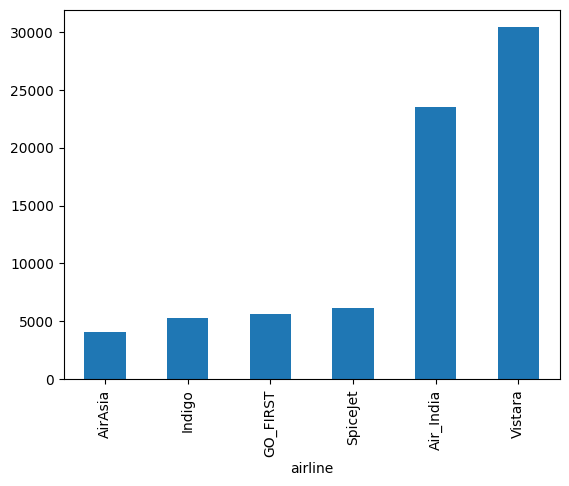

In [8]:
df.groupby(['airline'])['price'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='airline'>

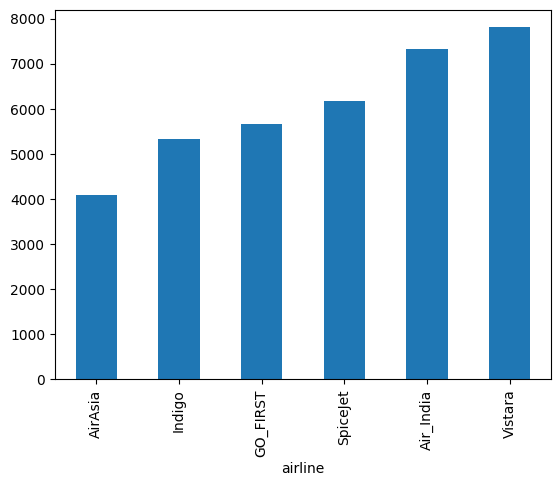

In [9]:
#Airline vs price
df[df['class']=='Economy'].groupby(['airline'])['price'].mean().sort_values().plot(kind='bar')

In [10]:
#Encode Airline

df['airline']=df['airline'].map({'AirAsia':0,'Indigo':1,'GO_FIRST':2,'SpiceJet':3,'Air_India':4 ,'Vistara':5})
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,3,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953
1,3,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953
2,0,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956
3,5,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955
4,5,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955


<Axes: xlabel='source_city'>

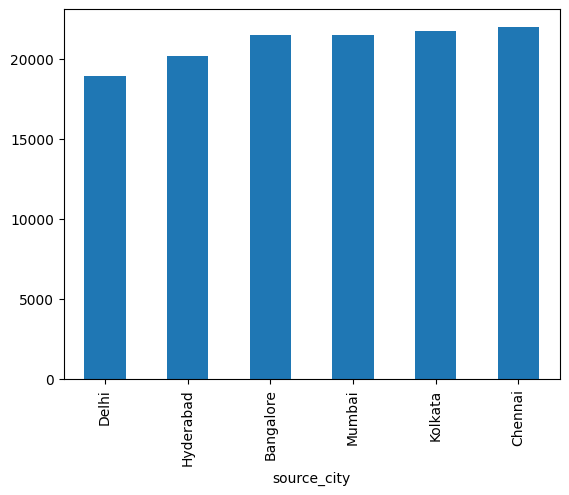

In [11]:
#Source_city vs price
df.groupby(['source_city'])['price'].mean().sort_values().plot(kind='bar')

In [12]:
#Encode Source_city
df['source_city']=df['source_city'].map({'Delhi':0,'Hyderabad':1,'Bangalore':2,'Mumbai':3,'Kolkata':4,'Chennai':5})
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,3,0,Evening,zero,Night,Mumbai,Economy,1,5953
1,3,0,Early_Morning,zero,Morning,Mumbai,Economy,1,5953
2,0,0,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956
3,5,0,Morning,zero,Afternoon,Mumbai,Economy,1,5955
4,5,0,Morning,zero,Morning,Mumbai,Economy,1,5955


<Axes: xlabel='destination_city'>

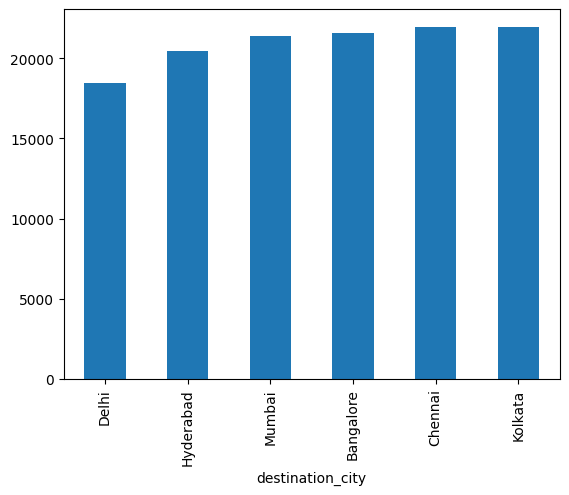

In [13]:
#Destination_city vs price
df.groupby(['destination_city'])['price'].mean().sort_values().plot(kind='bar')

In [14]:
#Encode Destination_city
df['destination_city']=df['destination_city'].map({'Delhi':0,'Hyderabad':1,'Bangalore':2,'Mumbai':3,'Chennai':4,'Kolkata':5})
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,3,0,Evening,zero,Night,3,Economy,1,5953
1,3,0,Early_Morning,zero,Morning,3,Economy,1,5953
2,0,0,Early_Morning,zero,Early_Morning,3,Economy,1,5956
3,5,0,Morning,zero,Afternoon,3,Economy,1,5955
4,5,0,Morning,zero,Morning,3,Economy,1,5955


In [15]:
#Encode departure_time and arrival_time
df['departure_time']=df['departure_time'].map({'Early_Morning':0,'Morning':1,'Afternoon':2,'Evening':3,'Night':4,'Late_Night':5})
df['arrival_time']=df['arrival_time'].map({'Early_Morning':0,'Morning':1,'Afternoon':2,'Evening':3,'Night':4,'Late_Night':5})
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,3,0,3,zero,4,3,Economy,1,5953
1,3,0,0,zero,1,3,Economy,1,5953
2,0,0,0,zero,0,3,Economy,1,5956
3,5,0,1,zero,2,3,Economy,1,5955
4,5,0,1,zero,1,3,Economy,1,5955


In [16]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [17]:
#Encode stops
df['stops']=df['stops'].map({'zero':0,'one':1,'two':2,'two_or_more':3})
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,3,0,3,0,4,3,Economy,1,5953
1,3,0,0,0,1,3,Economy,1,5953
2,0,0,0,0,0,3,Economy,1,5956
3,5,0,1,0,2,3,Economy,1,5955
4,5,0,1,0,1,3,Economy,1,5955


In [18]:
#Encode economy
df['class']=df['class'].map({'Economy':0,'Business':1})
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,3,0,3,0,4,3,0,1,5953
1,3,0,0,0,1,3,0,1,5953
2,0,0,0,0,0,3,0,1,5956
3,5,0,1,0,2,3,0,1,5955
4,5,0,1,0,1,3,0,1,5955


In [19]:
df['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

In [20]:
#Train Test Split
X=df.drop(['price'],axis=1)
Y=df['price']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((240122, 8), (60031, 8), (240122,), (60031,))

In [22]:
X_train

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left
259861,4,2,0,1,4,4,1,22
179199,5,1,0,1,4,4,0,35
45507,5,3,1,1,2,0,0,15
22623,2,0,3,1,4,5,0,16
91847,5,2,0,1,3,0,0,39
...,...,...,...,...,...,...,...,...
33867,5,0,1,1,0,1,0,39
84434,5,2,2,1,2,0,0,3
95816,4,2,0,1,3,3,0,12
203245,5,5,4,1,4,1,0,9


In [23]:
#Model Building
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [24]:
score=model.score(X_test,Y_test)
print(score)

0.9014592920002601


In [25]:
#mae
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(Y_test,model.predict(X_test))
print(mae)

4444.938493527357


In [27]:
#Save the model
import pickle
pickle.dump(model,open('LinearModel.pkl','wb'))

